In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
crop = pd.read_csv(r'E:\Data Analysis\Project\Crop\crop_production.csv')

In [3]:
crop.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
crop.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

**We can see 3730 rows are empty in production column and the reason is unknown hence we can delete these rows from the dataset**

In [5]:
crop.dropna(inplace=True)

In [6]:
crop.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [7]:
crop.shape

(242361, 7)

In [8]:
crop.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [9]:
# checking unique crops names 
# we observed that many crops were presenyed with their syononame so we decided all syononyms of crops to replace with their popular name
# like paddy and rice are same so we replace paddy with Rice
# also number of rows of crops sub-category were very less

crop.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

In [10]:
crop.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [11]:
# Removing white spaces from categorical columns
crop['State_Name'] = crop['State_Name'].apply(lambda x : x.strip())
crop['District_Name'] = crop['District_Name'].apply(lambda x : x.strip())
crop['Season'] = crop['Season'].apply(lambda x : x.strip())
crop['Crop'] = crop['Crop'].apply(lambda x : x.strip())

In [12]:
crop.Season.unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

In [13]:
crop.Season.value_counts()

Kharif        94283
Rabi          66160
Whole Year    56127
Summer        14811
Winter         6050
Autumn         4930
Name: Season, dtype: int64

**Deleting recordes where there is no production since it won't effect the analysis**

In [14]:
''' 
Crops that mainly grow during summer are called kharif crops and Kharif crops is also known as monsoon crops or autumn crops so 
we can replace the winter and Autumn seasons with Kharif.
Same way the Rabi crops are known as winter crops so we can replace winter season with Rabi.
'''
crop['Season'] = crop['Season'].apply(lambda x : x.replace('Autumn', 'Kharif'))

crop['Season'] = crop['Season'].apply(lambda x : x.replace('Summer', 'Kharif'))

crop['Season'] = crop['Season'].apply(lambda x : x.replace('Winter', 'Rabi'))


In [15]:
crop.Season.value_counts()

Kharif        114024
Rabi           72210
Whole Year     56127
Name: Season, dtype: int64

In [16]:
crop.drop(crop[crop['Production'] == 0].index,inplace=True)

In [18]:
print(crop.shape)

(238838, 7)


**Grouping Similar crops**

In [19]:
# we have replaced  kapas to cotton etc.

crop['Crop'] = crop['Crop'].apply(lambda x : x.replace('Kapas','Cotton(lint)').replace('Cotton(lint)','Cotton'))

crop.replace('Jute & mesta','Jute',inplace=True)
crop.replace('Mesta','Jute',inplace=True)

In [20]:
# we have replace sub-category of pulses with pulse

crop['Crop'] = crop['Crop'].apply(lambda x:x.replace('Other Kharif pulses','pulses')
                                    .replace('Other  Rabi pulses','pulses')
                                    .replace('Peas & beans (Pulses)','pulses')
                                    .replace('Pulses total','pulses')
                                    .replace('other misc. pulses','pulses')
                                    .replace('Moong(Green Gram)','pulses')
                                    .replace('Urad','pulses')
                                    .replace('Arhar/Tur','pulses')
                                    .replace('Bean','pulses')
                                    .replace('Ricebean (nagadal)','pulses')
                                    .replace('Lentil','pulses')
                                    .replace('Masoor','pulses')
                                    .replace('Khesari','pulses')
                                    .replace('Horse-gram','pulses')
                                    .replace('Rajmash Kholar','pulses'))

In [21]:
# Correcting few spelling mistakes
crop['Crop'] = crop['Crop'].apply(lambda x : x.replace('Atcanut (Raw)','Arecanut')
                                              .replace('Arcanut (Processed)','Arecanut')
                                              .replace('Arecanut','Arecanut'))

In [22]:
# we have replaced varienty of spices with othe spices
crop['Crop'] = crop['Crop'].apply(lambda x : x.replace('Black pepper','Other Spices')
                                                  .replace('Cardamom','Other Spices')
                                                  .replace('Perilla','Other Spices'))

In [23]:
#since number of rows for every fruits category were very less so we decided to megre all to fruits

crop['Crop'] = crop['Crop'].apply(lambda x : x.replace('Papaya','Fruits')
                                              .replace('Mango','Fruits')
                                              .replace('Orange','Fruits')
                                              .replace('Other Fresh Fruits','Fruits')
                                              .replace('Pineapple','Fruits')
                                              .replace('Citrus Fruit','Fruits')
                                              .replace('Pome Fruit','Fruits')
                                              .replace('Pome Granet','Fruits')
                                              .replace('Grapes','Fruits')
                                              .replace('Jack Fruit','Fruits')
                                              .replace('Sapota','Fruits')
                                              .replace('Lemon','Fruits'))

In [24]:
# we have replace sub-category with their main-category

crop['Crop'] = crop['Crop'].apply(lambda x : x.replace('Ginger','Dry ginger'))

crop['Crop'] = crop['Crop'].apply(lambda x : x.replace('Turnip','Onion'))

crop['Crop'] = crop['Crop'].apply(lambda x : x.replace('Cashewnut Raw','Cashewnut')
                                              .replace('Cashewnut Processed','Cashewnut'))

In [25]:
# we have replace sub-category of gram with their main-category

crop['Crop'] = crop['Crop'].apply(lambda x : x.replace('black gram','gram')
                                              .replace('Moth','gram')
                                              .replace('Blackgram','gram'))

In [26]:
# we have replace other Oilseeds total to  other oilseeds

crop['Crop'] = crop['Crop'].apply(lambda x : x.replace('Oilseeds total' ,'other oilseeds')
                                              .replace('Niger seed' ,'other oilseeds'))

In [27]:
# we have replace sub-category of milltes with their main-category

crop['Crop'] = crop['Crop'].apply(lambda x : x.replace('Other Cereals & Millets' ,'Bajra')
                                              .replace('Samai' ,'Bajra')
                                              .replace('Small millets' ,'Bajra')
                                              .replace('Ragi','Bajra')
                                              .replace('Varagu','Bajra')
                                              .replace('Jobster','Bajra'))

In [28]:
# we have replace sub-category of Vegetables with their main-category 

crop['Crop'] = crop['Crop'].apply(lambda x : x.replace('Coriander' ,'Other Vegetables')
                                              .replace('pulsess & Mutter(Vegetable)' ,'Other Vegetables')
                                              .replace('Bhindi' ,'Other Vegetables')
                                              .replace('Tomato','Other Vegetables')
                                              .replace('Cowpea(Lobia)','Other Vegetables')
                                              .replace('Cabbage','Other Vegetables')
                                              .replace('Carrot','Other Vegetables')
                                              .replace('Drum Stick','Other Vegetables')
                                              .replace('Redish','Other Vegetables')
                                              .replace('Cauliflower','Other Vegetables')
                                              .replace('Colocosia','Other Vegetables')
                                              .replace('Brinjal','Other Vegetables')
                                              .replace('Bottle Gourd','Other Vegetables')
                                              .replace('Bitter Gourd','Other Vegetables'))

In [29]:
#we have replace sub-category with their main-category

crop['Crop'] = crop['Crop'].apply(lambda x:x.replace('Niger seed','Sesamum'))
crop['Crop'] = crop['Crop'].apply(lambda x:x.replace('Korra','Total foodgrain'))
crop['Crop'] = crop['Crop'].apply(lambda x:x.replace('Paddy','Rice'))

In [30]:
#we have observed some cropes rows are very very less so it wont make any sense to visualization so we decided to drop those rows

crop.drop(crop[crop['Crop'] == 'Tea'].index,inplace=True)
crop.drop(crop[crop['Crop'] == 'Coffee'].index,inplace=True)
crop.drop(crop[crop['Crop'] == 'Rubber'].index,inplace=True)
crop.drop(crop[crop['Crop'] == 'Cond-spcs other'].index,inplace=True)

In [31]:
# checking unique crops types after replacement
crop.Crop.unique()

array(['Arecanut', 'pulses', 'Rice', 'Banana', 'Cashewnut', 'Coconut',
       'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Other Spices', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Groundnut', 'Sunflower', 'Bajra', 'Castor seed',
       'Cotton', 'Jowar', 'Total foodgrain', 'Tobacco', 'Gram', 'Wheat',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'Other Vegetables',
       'Potato', 'Fruits', 'Soyabean', 'Jute', 'Rapeseed &Mustard',
       'Garlic', 'gram', 'Barley', 'Sannhamp', 'Guar seed'], dtype=object)

In [32]:
crop

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Kharif,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Kharif,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Rabi,Rice,279151.0,597899.0


In [34]:
crop.to_csv(r'E:\Data Analysis\Project\Crop\crop_production_cleaned_new.csv')

In [35]:
# to find outlier we created new column Producation_area_factor

crop['Producation_area_factor'] = crop['Production'] / crop['Area']

In [36]:
# checking newly created column 
crop

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Producation_area_factor
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Kharif,Rice,306.0,801.0,2.617647
246087,West Bengal,PURULIA,2014,Kharif,Sesamum,627.0,463.0,0.738437
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,50.154321
246089,West Bengal,PURULIA,2014,Rabi,Rice,279151.0,597899.0,2.141848


**Finding outlier**

In [37]:
Q1 = crop['Area'].quantile(0.25)
Q3 = crop['Area'].quantile(0.75)
Q1, Q3

(91.0, 4700.0)

In [38]:
IQR = Q3 - Q1

In [39]:
lower_fence = Q1 - 1.5*IQR
higher_fence = Q3 + 1.5*IQR
lower_fence,higher_fence

(-6822.5, 11613.5)

In [40]:
area_outlier = crop[(crop['Area'] < lower_fence) | (crop['Area'] > higher_fence)]

In [41]:
area_outlier['Crop'].value_counts()

Rice                 9138
Wheat                5080
pulses               4668
Maize                2514
Bajra                2312
Gram                 1974
Jowar                1902
Cotton               1474
Rapeseed &Mustard    1469
Groundnut            1449
Sugarcane            1321
Soyabean             1069
Sesamum               574
Coconut               556
Sunflower             498
Potato                387
Jute                  298
Guar seed             246
Castor seed           241
other oilseeds        238
Dry chillies          173
Arecanut              169
Cashewnut             163
Barley                154
Total foodgrain       153
Tobacco               144
Safflower             137
Other Vegetables      111
gram                  103
Linseed                99
Tapioca                93
Onion                  83
Other Spices           71
Fruits                 63
Banana                 33
Turmeric               30
Garlic                 11
Dry ginger              6
Name: Crop, 

**Deviding the state into 4 different zone for better analysis**

In [42]:
West_India= ['Maharashtra','Goa','Gujarat','Dadra and Nagar Haveli']
East_India= ['Arunachal Pradesh','Assam','Manipur','Meghalaya','Mizoram','Nagaland','Sikkim','Tripura','West Bengal','Bihar','Odisha','Jharkhand' ]
North_India=['Jammu and Kashmir ','Himachal Pradesh','Punjab','Uttarakhand','Haryana','Rajasthan','Uttar Pradesh','Chandigarh','Madhya Pradesh','Chhattisgarh']   # Delhi
South_India = ['Andhra Pradesh','Karnataka','Kerala','Tamil Nadu','Telangana','Puducherry']

In [43]:
# creating a list for zones
zone = []

for state in crop['State_Name']:
    if state in West_India:
         zone.append('West India')
    elif state in East_India:
         zone.append('East India')
    elif state in North_India:
         zone.append('North India')
    elif state in South_India: 
         zone.append('South India')
    else:
         zone.append('Union Territory')

In [44]:
# creatinh new column 
crop['zone'] = zone

In [45]:
crop.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Producation_area_factor,zone
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896,Union Territory
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,pulses,2.0,1.0,0.500000,Union Territory
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059,Union Territory
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045,Union Territory
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167,Union Territory
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,3583.223250,Union Territory
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0,2.777778,Union Territory
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0,2.000000,Union Territory
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0,3.000000,Union Territory
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0,4.225000,Union Territory


**Exporting Cleaned dataset for visualization**

In [66]:
# crop.to_csv(r'E:\Data Analysis\Project\Crop\crop_production_cleaned.csv')

In [46]:
crop['zone'].value_counts()

North India        91162
East India         71482
South India        53059
West India         21229
Union Territory     1791
Name: zone, dtype: int64

In [47]:
crop.isnull().sum()

State_Name                 0
District_Name              0
Crop_Year                  0
Season                     0
Crop                       0
Area                       0
Production                 0
Producation_area_factor    0
zone                       0
dtype: int64

In [50]:
# checking value counts of year in dataset

crop['Crop_Year'].value_counts()

2003    15541
2002    15060
2007    14261
2008    14230
2006    13976
2004    13834
2010    13793
2011    13791
2009    13767
2005    13519
2013    13474
2000    13393
2012    13183
2001    13107
1999    12258
1998    11262
2014    10814
1997     8899
2015      561
Name: Crop_Year, dtype: int64

In [51]:
# sinces the number of rows for year 2015 is very less so it will not give correct visualization for year 2015 
# so we decided to remove it from dataset

crop.drop(crop[crop['Crop_Year'] == 2015].index,inplace=True)

In [52]:
val = crop.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].values
lab = crop.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].index

C:\Users\Prashantha\AppData\Local\Temp\ipykernel_17900\1617930290.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  val = crop.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].values
C:\Users\Prashantha\AppData\Local\Temp\ipykernel_17900\1617930290.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lab = crop.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].index


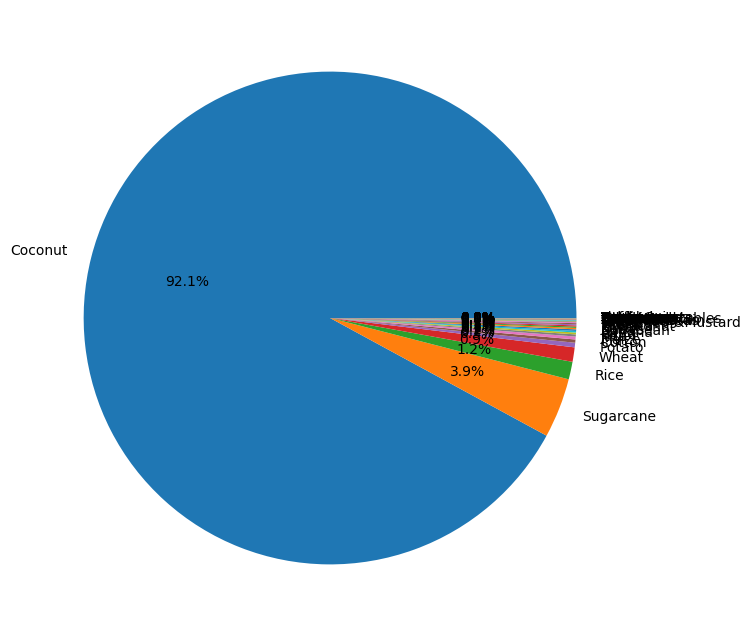

In [53]:
# we plotted pie chart of Production of different crops to check the outliers in crops

plt.figure(figsize=(10,8))
plt.pie(val, labels = lab, autopct = '%0.1f%%')
plt.show()

In [54]:
# we have observed that Production of coconut is more than 92% of total Production so we not able to visualize our dataset
# so we have decided to visualize coconut seprately

coconut = crop[crop['Crop'] == 'Coconut']

coconut.to_csv(r'E:\Data Analysis\Project\Crop\coconut.csv')

crop.drop(crop[crop['Crop']=='Coconut'].index,inplace=True)

In [55]:
# we plotted pie chart between total Production and different types of crops after removing outlier 

val = crop.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].values
lab = crop.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].index

C:\Users\Prashantha\AppData\Local\Temp\ipykernel_17900\3343666810.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  val = crop.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].values
C:\Users\Prashantha\AppData\Local\Temp\ipykernel_17900\3343666810.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lab = crop.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].index


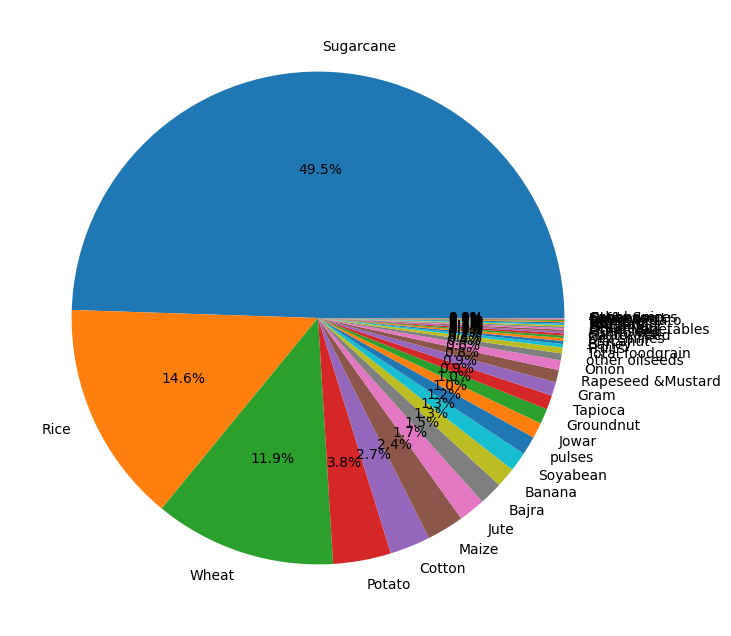

In [56]:
# we have observed that now our dataset is balance

plt.figure(figsize=(10,8))
plt.pie(val,labels=lab,autopct='%0.1f%%')
plt.show()

In [57]:
crop.to_csv(r'E:\Data Analysis\Project\Crop\crop_final_new.csv')

# conclusion

*Since we have found out that number of outliers are almost approx 20% and 46000k in numbers so we can not remove these outliers to avoide loss of information and producation also depends types soil and area,availability of water to farmer
so we dont have much information about these other factors so we cant not remove outliers on basis of Producation_area_factor  
Producation_area_factor can not be same for all crops sinces this factors is hihh for coconut and very less for total_foodgrain
so we cant not compare both on one scale we have observed that Production of coconut is more than 92% of total Production so we not able to visualize our dataset so we have decided to consider coconut as an outlier and we have removed it from dataset*